# Text Analysis - Dictionary of the Spanish language
- **Created by: Andrés Segura-Tinoco**
- **Created on: Aug 20, 2020**
- **Created on: Aug 02, 2021**
- **Data: Dictionary of the Spanish language**

### Text Analysis
1. Approximate number of words in the DSL
2. Number of words with acute accent in Spanish language
3. Frequency of words per size
4. Top 15 bigger words
5. Frequency of letters in DSL words
6. Vowel and consonant ratio
7. Frequency of words per letter of the alphabet
8. Most frequent n-grams

In [1]:
# Load Python libraries
import re
import codecs
import pandas as pd
from collections import Counter

In [2]:
# Import plot libraries
import matplotlib.pyplot as plt

### Util functions

In [3]:
# Util function - Read a plain text file
def read_file_lines(file_path):
    lines = []
    
    with codecs.open(file_path, encoding='utf-8') as f:
        for line in f:
            lines.append(line)
    
    return lines

In [4]:
# Util function - Apply data quality to words
def apply_dq_word(word):
    new_word = word.replace('\n', '')
    
    # Get first token
    if ',' in new_word:
        new_word = new_word.split(',')[0]
    
    # Remove extra whitespaces
    new_word = new_word.strip()
    
    # Remove digits
    while re.search("\d", new_word):
        new_word = new_word[0:len(new_word)-1]
        
    return new_word

In [5]:
# Util function - Plot column chart
def plot_col_chart(df, figsize, x_var, y_var, title, color='#1f77b4', legend=None, x_label=None):
    fig, ax = plt.subplots()
    df.plot.bar(ax=ax, x=x_var, y=y_var, color=color, figsize=figsize)
    if legend:
        ax.legend(legend)
    else:
        ax.get_legend().remove()
    if x_label:
        x = np.arange(len(x_label))
        plt.xticks(x, x_label, rotation=0)
    else:
        plt.xticks(rotation=0)
    plt.title(title, fontsize=16)
    plt.xlabel(x_var.capitalize())
    plt.ylabel(y_var.capitalize())
    plt.show()

In [6]:
# Util function - Plot bar chart
def plot_bar_chart(df, figsize, x_var, y_var, title, color='#1f77b4', legend=None):
    fig, ax = plt.subplots()
    df.plot.barh(ax=ax, x=x_var, y=y_var, figsize=figsize)
    if legend:
        ax.legend(legend)
    else:
        ax.get_legend().remove()
    plt.title(title, fontsize=16)
    plt.xlabel(y_var.capitalize())
    plt.ylabel(x_var.capitalize())
    plt.show()

## 1. Approximate number of words in the DSL

In [7]:
# Range of files by first letter of word
letter_list = list(map(chr, range(97, 123)))
letter_list.append('ñ')
len(letter_list)

27

In [8]:
# Read words by letter [a-z]
word_dict = Counter()
file_path = '../data/dics/'

# Read data only first time
for letter in letter_list:
    filename = file_path + letter + '.txt'
    word_list = read_file_lines(filename)
    
    for word in word_list:
        word = apply_dq_word(word)
        word_dict[word] += 1

In [9]:
# Show results
n_words = len(word_dict)
print('Total of different words: %d' % n_words)

Total of different words: 88190


## 2. Number of words with acute accent in Spanish language

In [10]:
# Counting words with acute accent
aa_freq = Counter()
regexp = re.compile('[áéíóúÁÉÍÓÚ]')

for word in word_dict.keys():
    match = regexp.search(word.lower())
    if match:
        l = match.group(0)
        aa_freq[l] += 1

# Show results
count = sum(aa_freq.values())
perc_words = 100.0 * count / n_words
print('Total words with acute accent: %d (%0.2f %s)' % (count, perc_words, '%'))

Total words with acute accent: 16334 (18.52 %)


In [11]:
# Cooking dataframe
df = pd.DataFrame.from_records(aa_freq.most_common(), columns = ['vowel', 'frequency']).sort_values(by=['vowel'])
df['perc'] = round(100.0 * df['frequency'] / count, 2)
df

,vowel,frequency,perc
2,á,2514,15.39
3,é,1748,10.70
1,í,4915,30.09
0,ó,6599,40.40
4,ú,558,3.42


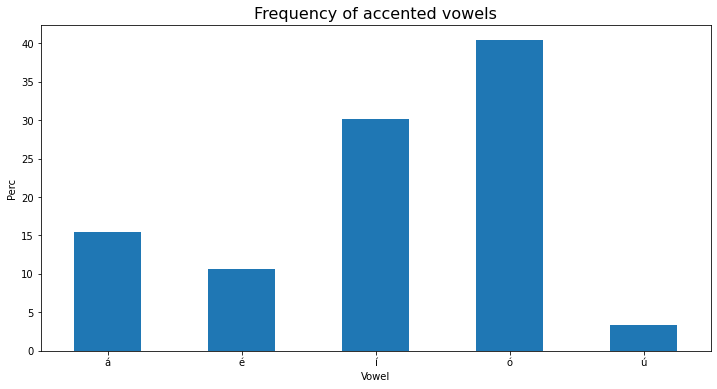

In [12]:
# Plotting data
figsize = (12, 6)
x_var = 'vowel'
y_var = 'perc'
title = 'Frequency of accented vowels'
plot_col_chart(df, figsize, x_var, y_var, title)

## 3. Frequency of words per size

In [13]:
# Processing
word_size = Counter()

for word in word_dict.keys():
    size = len(word)
    word_size[size] += 1

In [14]:
# Cooking dataframe
df = pd.DataFrame.from_records(word_size.most_common(), columns = ['size', 'frequency']).sort_values(by=['size'])
df['perc'] = 100.0 * df['frequency'] / n_words
df

,size,frequency,perc
18,1,27,0.030616
16,2,105,0.119061
13,3,466,0.528405
9,4,2102,2.383490
6,5,5323,6.035832
4,6,9097,10.315228
2,7,12569,14.252183
0,8,14129,16.021091
1,9,13486,15.291983
3,10,10983,12.453793


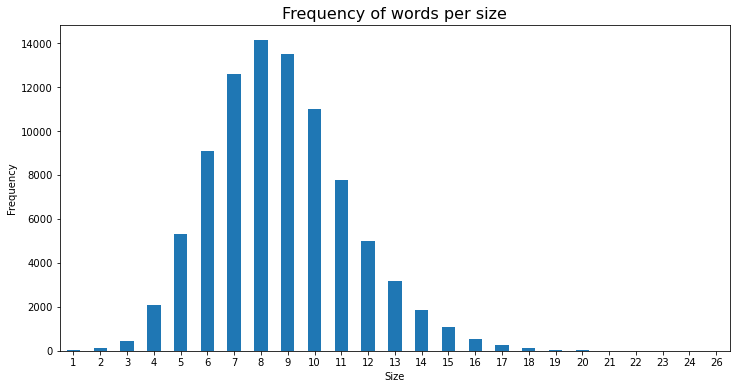

In [15]:
# Plotting data
figsize = (12, 6)
x_var = 'size'
y_var = 'frequency'
title = 'Frequency of words per size'
plot_col_chart(df, figsize, x_var, y_var, title)

## 4. Top 15 bigger words

In [16]:
# Processing
top_size = Counter()
threshold = 21

for word in word_dict.keys():
    size = len(word)
    if size >= threshold:
        top_size[word] = size

# Top 15 bigger words
top_size.most_common()

[('contencioso-administrativo', 26),
 ('contradictio in terminis', 24),
 ('electroencefalografista', 23),
 ('anticonstitucionalidad', 22),
 ('electroencefalográfico', 22),
 ('esternocleidomastoideo', 22),
 ('in partibus infidelium', 22),
 ('antinorteamericanismo', 21),
 ('constitucionalización', 21),
 ('contrarrevolucionario', 21),
 ('corresponsabilización', 21),
 ('electroencefalografía', 21),
 ('interdisciplinariedad', 21),
 ('otorrinolaringológico', 21),
 ('preterintencionalidad', 21)]

## 5. Frequency of letters in DSL words

In [17]:
# Processing
letter_freq = Counter()

for word in word_dict.keys():
    word = word.lower()
    for l in word:
        letter_freq[l] += 1

n_total = sum(letter_freq.values())
n_total

769596

In [18]:
# Cooking dataframe
df = pd.DataFrame.from_records(letter_freq.most_common(), columns = ['letter', 'frequency']).sort_values(by=['letter'])
df['perc'] = 100.0 * df['frequency'] / n_total
df

,letter,frequency,perc
31,,316,0.041061
29,-,602,0.078223
0,a,107146,13.922370
14,b,14301,1.858248
6,c,42924,5.577472
10,d,28937,3.760025
1,e,72597,9.433131
16,f,8321,1.081217
15,g,13338,1.733117
17,h,8207,1.066404


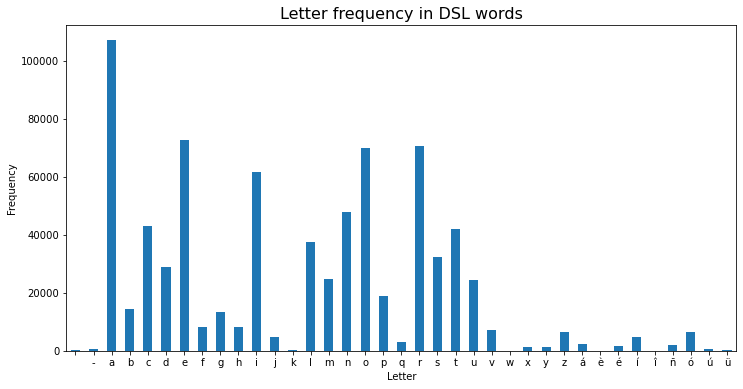

In [19]:
# Plotting data
figsize = (12, 6)
x_var = 'letter'
y_var = 'frequency'
title = 'Letter frequency in DSL words'
plot_col_chart(df, figsize, x_var, y_var, title)

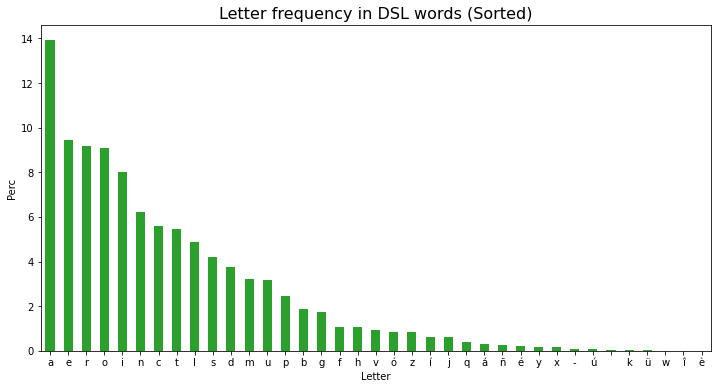

In [20]:
# Plotting sorted data
figsize = (12, 6)
x_var = 'letter'
y_var = 'perc'
title = 'Letter frequency in DSL words (Sorted)'
color = '#2ca02c'
plot_col_chart(df.sort_values(by='perc', ascending=False), figsize, x_var, y_var, title, color)

## 6. Vowel and consonant ratio

In [21]:
vowel_list = 'aeiouáéíóúèîü'
vowel_total = 0
consonant_total = 0

In [22]:
for ix, row in df.iterrows():
    letter = str(row['letter'])
    freq = int(row['frequency'])
    
    if letter in vowel_list:
        vowel_total += freq
    elif letter.isalpha():
        consonant_total += freq

letter_total = vowel_total + consonant_total

In [23]:
# Initialize list of lists 
data = [['vowels', vowel_total, (100.0 * vowel_total / letter_total)], 
        ['consonant', consonant_total, (100.0 * consonant_total / letter_total)]]
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['type', 'frequency', 'perc'])
df

,type,frequency,perc
0,vowels,352244,45.82465
1,consonant,416434,54.17535


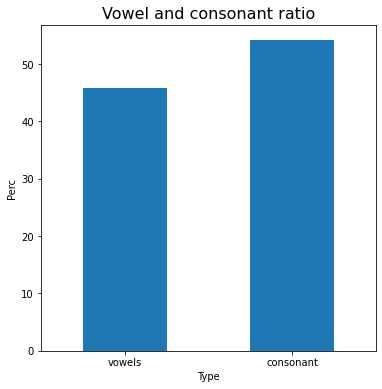

In [24]:
# Plotting data
figsize = (6, 6)
x_var = 'type'
y_var = 'perc'
title = 'Vowel and consonant ratio'
plot_col_chart(df, figsize, x_var, y_var, title)

## 7. Frequency of words per letter of the alphabet

In [25]:
norm_dict = {'á':'a', 'é':'e', 'í':'i', 'ó':'o', 'ú':'u'}

In [26]:
# Processing
first_letter_freq = Counter()
for word in word_dict.keys():
    first_letter = word[0].lower()
    
    if first_letter.isalpha():
        if first_letter in norm_dict.keys():
            first_letter = norm_dict[first_letter]
        first_letter_freq[first_letter] += 1

In [27]:
# Cooking dataframe
df = pd.DataFrame.from_records(first_letter_freq.most_common(), columns = ['letter', 'frequency']).sort_values(by=['letter'])
df['perc'] = 100.0 * df['frequency'] / n_words
df

,letter,frequency,perc
1,a,10747,12.186189
9,b,3688,4.181880
0,c,12194,13.826965
4,d,5776,6.549495
3,e,7124,8.078013
11,f,2881,3.266810
12,g,2873,3.257739
14,h,2172,2.462864
10,i,3211,3.641002
18,j,950,1.077220


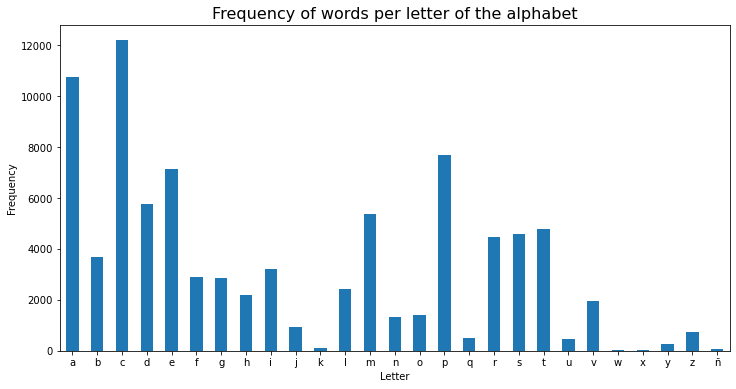

In [28]:
# Plotting data
figsize = (12, 6)
x_var = 'letter'
y_var = 'frequency'
title = 'Frequency of words per letter of the alphabet'
plot_col_chart(df, figsize, x_var, y_var, title)

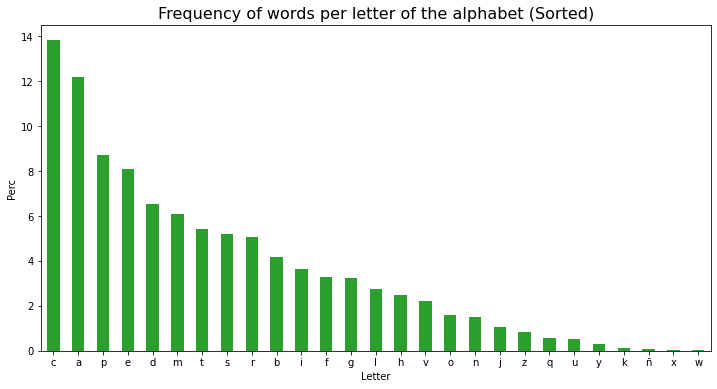

In [29]:
# Plotting sorted data
figsize = (12, 6)
x_var = 'letter'
y_var = 'perc'
title = 'Frequency of words per letter of the alphabet (Sorted)'
color = '#2ca02c'
plot_col_chart(df.sort_values(by='perc', ascending=False), figsize, x_var, y_var, title, color)

## 8. Most frequent n-grams

In [30]:
# Processing
top_ngrams = 25
bi_grams = Counter()
tri_grams = Counter()

for word in word_dict.keys():
    word = word.lower()
    n = len(word)
    
    size = 2
    for i in range(size, n+1):
        n_grams = word[i-size:i]
        bi_grams[n_grams] += 1
    
    size = 3
    for i in range(size, n+1):
        n_grams = word[i-size:i]
        tri_grams[n_grams] += 1

In [31]:
# Cooking dataframe
df_bi = pd.DataFrame.from_records(bi_grams.most_common(top_ngrams), columns=['bi-grams', 'frequency'])
df_tri = pd.DataFrame.from_records(tri_grams.most_common(top_ngrams), columns=['tri-grams', 'frequency'])

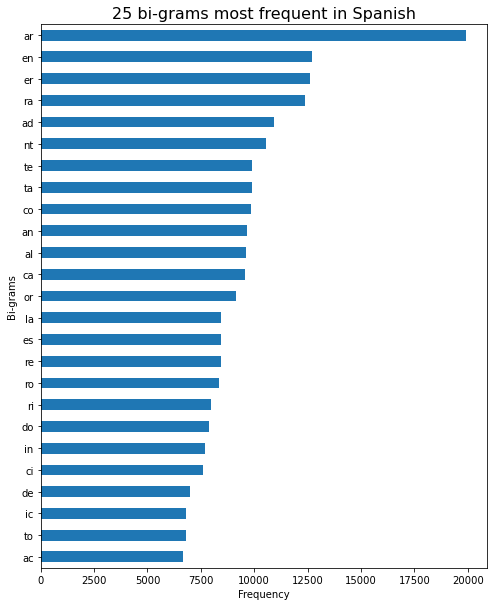

In [32]:
# Plotting sorted data
figsize = (8, 10)
x_var = 'bi-grams'
y_var = 'frequency'
title = str(top_ngrams) + ' bi-grams most frequent in Spanish'
plot_bar_chart(df_bi.sort_values(by=['frequency']), figsize, x_var, y_var, title)

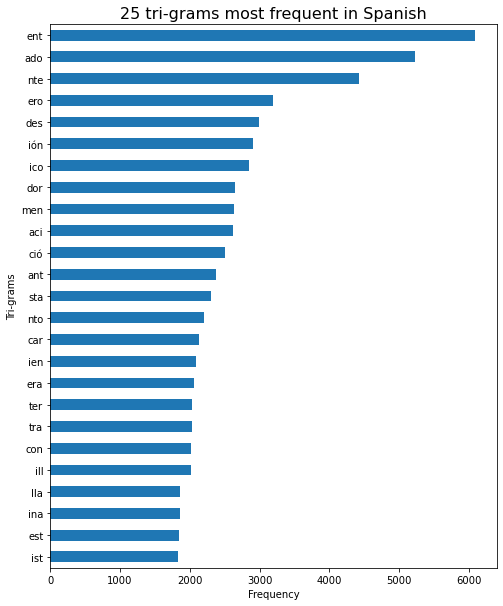

In [33]:
# Plotting sorted data
figsize = (8, 10)
x_var = 'tri-grams'
y_var = 'frequency'
title = str(top_ngrams) + ' tri-grams most frequent in Spanish'
plot_bar_chart(df_tri.sort_values(by=['frequency']), figsize, x_var, y_var, title)

---
<a href="https://ansegura7.github.io/DSL_Analysis/">« Home</a>